<a href="https://colab.research.google.com/github/Leshaan/lepackage/blob/master/Xente_Fraud_Detection_Challenge_LeshaanPadayachy_EDSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Hackathon

For the specifications for today's Hackathon use the slides linked below. Just note a couple things before you start:
* Use your full name and ```_EDSA``` as your Zindi username.
* The dataset for this challenge is very large and will take a long time to process. In order to use your time wisely, only use a small subset of the data to figure out how to solve this challenge, and once you're happy with that, train your model with the entire dataset.
* This Zindi challenge is tough. This will be taken into account when the supervisors mark your work. Do not worry too much about your placement on the leaderboard. In the Regression Hackathon ```laura_the_explorer``` was in first place but is outside the top 100 in this challenge
* To submit your Hackathon to Athena, zip your notebook and your submission csv file, and upload that here. Note that your report card will say you have 100% once you submit your file.
* Please attach the *Honour code* (below) cell to your notebook. 

Further instructions found on these slides: https://docs.google.com/presentation/d/1AbVndI5aOd27Jm0E1qNoYzRtWiZ6-DE3BDE0djGxzIk/edit?usp=sharing

** Good luck! **

## Honour Code
I Leshaan Padayachy, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

**Importing libraries**

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup

import string
from string import digits
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

class color:
     BOLD = '\033[1m'
     UNDERLINE = '\033[4m'
     END = '\033[0m'

        
import warnings
warnings.filterwarnings("ignore")

**Importing the data**

test and train datasets

In [96]:
data = pd.read_csv('training.csv')
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [97]:
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(9566, 16)

In [98]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


Exploratory data analysis

In [99]:
data.shape

(95662, 16)

In [100]:
data.isnull().values.any()

False

In [101]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


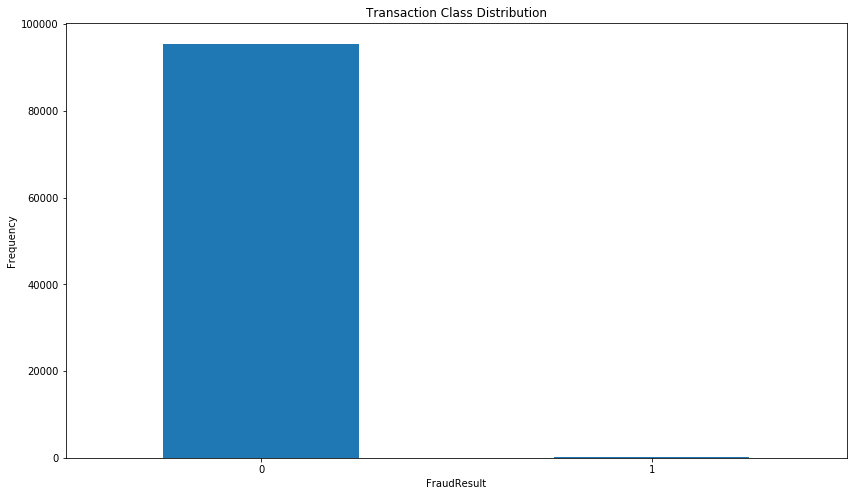

In [103]:
count_classes = pd.value_counts(data['FraudResult'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("FraudResult")

plt.ylabel("Frequency");

In [0]:
Fraud = data[data['FraudResult']==1]

Normal = data[data['FraudResult']==0]

In [105]:
Fraud.shape

(193, 16)

In [106]:
Normal.shape

(95469, 16)

In [107]:
Fraud.Amount.describe()

count    1.930000e+02
mean     1.535272e+06
std      2.100525e+06
min     -9.000000e+05
25%      5.000000e+05
50%      6.000000e+05
75%      2.000000e+06
max      9.880000e+06
Name: Amount, dtype: float64

In [108]:
Normal.Amount.describe()

count    9.546900e+04
mean     3.627723e+03
std      4.035711e+04
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.500000e+03
max      2.400000e+06
Name: Amount, dtype: float64

**Graphic representation**

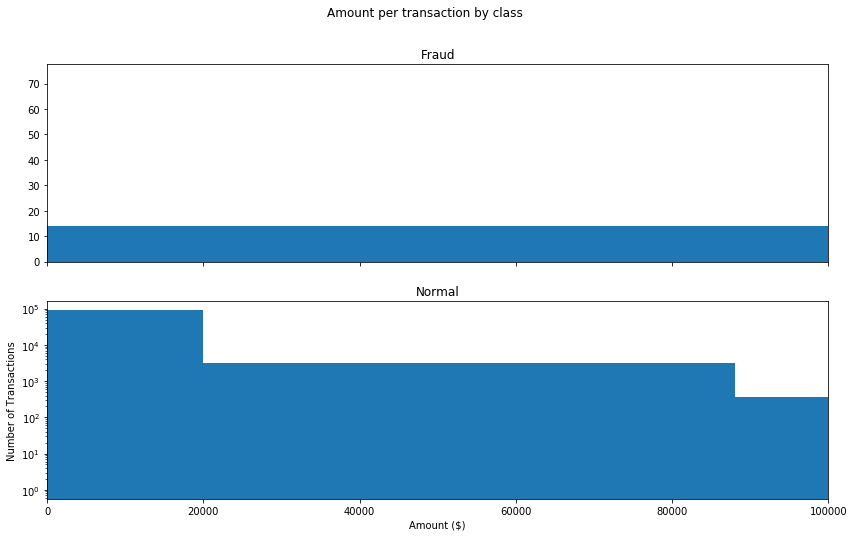

In [109]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,100000))
plt.yscale('log')
plt.show();

In [110]:
data1.shape

(9566, 16)

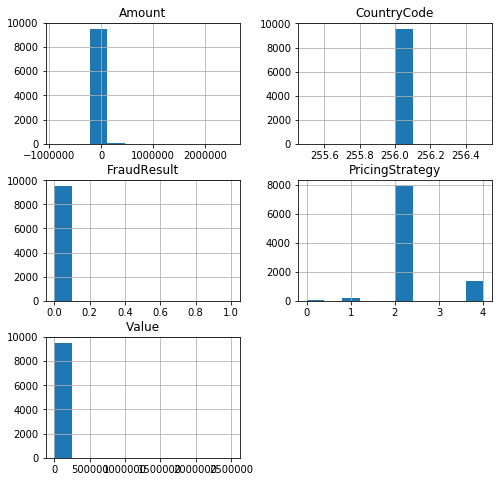

In [111]:
data1.hist(figsize=(8,8))
plt.show()

In [0]:
Fraud = data1[data1['FraudResult']==1]

Valid = data1[data1['FraudResult']==0]

outlier_fraction = len(Fraud)/float(len(Valid))


In [113]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))


0.0022001047668936615
Fraud Cases : 21
Valid Cases : 9545


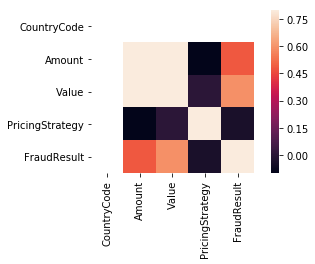

In [114]:
correlation_matrix = data1.corr()

fig = plt.figure(figsize=(6,3))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

In [115]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["FraudResult"]]
# Store the variable we are predicting 
target = "FraudResult"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(9566, 15)
(9566,)


**Model Prediction**

In [0]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}
